In [20]:
import random
import os

import sklearn.preprocessing

<h1> Step 1: Split the dataset into training and testing sets</h1>

In [21]:
angry_files = []
angry_test = []
for filename in os.listdir("data_folder/angry/"):
    f = os.path.join("./data_folder/angry/", filename)
    if os.path.isfile:
        angry_files.append(f)
angry_training=random.sample(angry_files, k=70)
for file in angry_files:
    if file not in angry_training:
        angry_test.append(file)

fear_files = []
fear_test = []
for filename in os.listdir("data_folder/fear/"):
    f = os.path.join("./data_folder/fear/", filename)
    if os.path.isfile:
        fear_files.append(f)
fear_training=random.sample(fear_files, k=70)
for file in fear_files:
    if file not in fear_training:
        fear_test.append(file)

happy_files = []
happy_test = []
for filename in os.listdir("data_folder/happy/"):
    f = os.path.join("./data_folder/happy/", filename)
    if os.path.isfile:
        happy_files.append(f)
happy_training=random.sample(happy_files, k=70)
for file in happy_files:
    if file not in happy_training:
        happy_test.append(file)

sad_files = []
sad_test = []
for filename in os.listdir("data_folder/sad/"):
    f = os.path.join("./data_folder/sad/", filename)
    if os.path.isfile:
        sad_files.append(f)
sad_training=random.sample(sad_files, k=70)
for file in sad_files:
    if file not in sad_training:
        sad_test.append(file)


<h1>Step 2: Exploratory Data Analysis</h1>

In [22]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# label distribution of dataset
df_angry_training = pd.DataFrame(angry_training, columns=["Track"])
df_angry_test = pd.DataFrame(angry_test, columns=["Track"])

df_fear_training = pd.DataFrame(fear_training, columns=["Track"])
df_fear_test = pd.DataFrame(fear_test, columns=["Track"])

df_happy_training = pd.DataFrame(happy_training, columns=["Track"])
df_happy_test = pd.DataFrame(happy_test, columns=["Track"])

df_sad_training = pd.DataFrame(sad_training, columns=["Track"])
df_sad_test = pd.DataFrame(sad_test, columns=["Track"])

df_happy_training.head()

,Track
0,./data_folder/happy/YAF_whip_happy.wav
1,./data_folder/happy/YAF_pole_happy.wav
2,./data_folder/happy/YAF_vine_happy.wav
3,./data_folder/happy/YAF_note_happy.wav
4,./data_folder/happy/YAF_mop_happy.wav


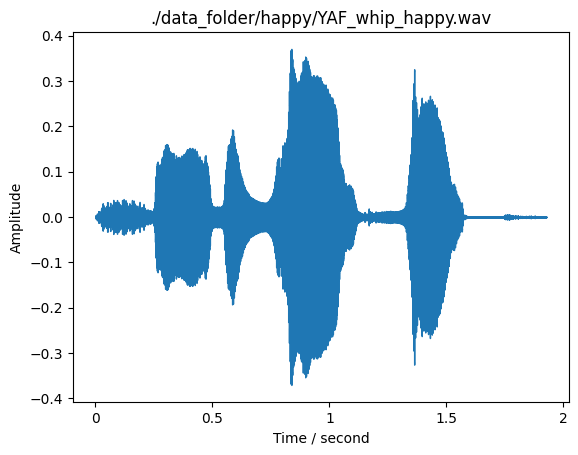

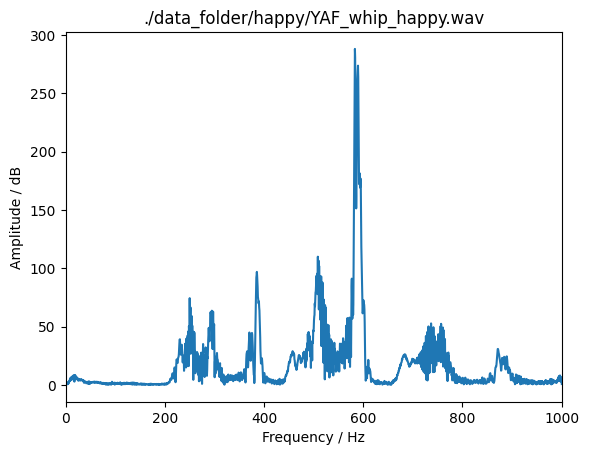

In [24]:
# plot audio in time and frequency domain
signal,sample_rate = librosa.load(happy_training[0])

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title(happy_training[0])
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.title(happy_training[0])
plt.xlim([0, 1000])
plt.show()

<h1>3: Acoustic Feature Extraction</h1>

In [25]:
from helpers import *

In [26]:
# audio feature extraction: loudness
df_angry_test = getLoudness(df_angry_test, angry_test)
df_angry_training = getLoudness(df_angry_training, angry_training)

df_fear_test = getLoudness(df_fear_test, fear_test)
df_fear_training = getLoudness(df_fear_training, fear_training)

df_happy_test = getLoudness(df_happy_test, happy_test)
df_happy_training = getLoudness(df_happy_training, happy_training)

df_sad_test = getLoudness(df_sad_test, sad_test)
df_sad_training = getLoudness(df_sad_training, sad_training)

In [27]:
# audio feature extraction: mel-frequency cepstral coefficients
df_angry_test = getMelFreq(df_angry_test, angry_test)
df_angry_training = getMelFreq(df_angry_training, angry_training)

df_fear_test = getMelFreq(df_fear_test, fear_test)
df_fear_training = getMelFreq(df_fear_training, fear_training)

df_happy_test = getMelFreq(df_happy_test, happy_test)
df_happy_training = getMelFreq(df_happy_training, happy_training)

df_sad_test = getMelFreq(df_sad_test, sad_test)
df_sad_training = getMelFreq(df_sad_training, sad_training)

In [28]:
# audio feature extraction: zero crossing rate
df_angry_test = getZCR(df_angry_test, angry_test)
df_angry_training = getZCR(df_angry_training, angry_training)

df_fear_test = getZCR(df_fear_test, fear_test)
df_fear_training = getZCR(df_fear_training, fear_training)

df_happy_test = getZCR(df_happy_test, happy_test)
df_happy_training = getZCR(df_happy_training, happy_training)

df_sad_test = getZCR(df_sad_test, sad_test)
df_sad_training = getZCR(df_sad_training, sad_training)

In [29]:
# audio feature extraction: chroma -> how much energy of each pitch class is in the signal
df_angry_test = getChroma(df_angry_test, angry_test)
df_angry_training = getChroma(df_angry_training, angry_training)

df_fear_test = getChroma(df_fear_test, fear_test)
df_fear_training = getChroma(df_fear_training, fear_training)

df_happy_test = getChroma(df_happy_test, happy_test)
df_happy_training = getChroma(df_happy_training, happy_training)

df_sad_test = getChroma(df_sad_test, sad_test)
df_sad_training = getChroma(df_sad_training, sad_training)

In [30]:
# audio feature extraction: mel spectrogram -> display pitch in a more regularized distribution
df_angry_test = getMelSpect(df_angry_test, angry_test)
df_angry_training = getMelSpect(df_angry_training, angry_training)

df_fear_test = getMelSpect(df_fear_test, fear_test)
df_fear_training = getMelSpect(df_fear_training, fear_training)

df_happy_test = getMelSpect(df_happy_test, happy_test)
df_happy_training = getMelSpect(df_happy_training, happy_training)

df_sad_test = getMelSpect(df_sad_test, sad_test)
df_sad_training = getMelSpect(df_sad_training, sad_training)

In [31]:
df_angry_training.head(10)

,Track,Loudness,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_Spectrogram_3,Mel_Spectrogram_4,Mel_Spectrogram_5,Mel_Spectrogram_6,Mel_Spectrogram_7,Mel_Spectrogram_8,Mel_Spectrogram_9,Mel_Spectrogram_10,Mel_Spectrogram_11,Mel_Spectrogram_12
0,./data_folder/angry/YAF_nag_angry.wav,"[0.0012340094235283974, 0.006466740017859598, ...","[-456.25763, -27.732897, 13.958537, 15.429293,...","[-362.7772, -73.03853, 39.42132, -1.7777697, -...","[-340.2886, -98.086494, 47.160473, -14.23308, ...","[-346.4555, -102.28121, 52.642418, -24.406876,...","[-342.17303, -98.198166, 42.88776, -42.203037,...","[-332.46072, -84.6318, 21.281368, -52.678, 6.7...","[-325.47568, -64.92009, 15.723175, -50.89023, ...","[-285.72235, -16.179276, 35.41314, -28.500685,...",...,"[0.00014806811, 0.00032999358, 0.00027051553, ...","[0.00017381013, 0.00012667145, 0.00020512691, ...","[0.00013485257, 0.00015784311, 0.0005192836, 0...","[0.000115430346, 0.0002290554, 0.00079482584, ...","[0.00014319876, 0.00029585758, 0.00081561925, ...","[0.033927493, 0.017549178, 0.004831728, 0.0021...","[1.2291354, 2.6995974, 1.4198798, 0.034549955,...","[2.6785975, 17.44763, 8.888158, 0.68040735, 0....","[1.943539, 17.679752, 16.664785, 3.9577494, 0....","[1.6691527, 9.42408, 35.311337, 8.930139, 0.29..."
1,./data_folder/angry/YAF_neat_angry.wav,"[0.0017284708340126443, 0.007551320665811047, ...","[-453.79233, -38.202927, 36.572594, 26.270008,...","[-373.63144, -77.06798, 57.264935, 12.821234, ...","[-362.94705, -96.20566, 61.239487, -10.388794,...","[-372.99417, -100.74739, 56.37419, -27.668182,...","[-378.51205, -105.68269, 51.43344, -26.19888, ...","[-371.55484, -107.20324, 40.971607, -32.770863...","[-347.05222, -90.06781, 28.190353, -43.39795, ...","[-335.36462, -80.313065, 14.619196, -48.303032...",...,"[0.00022507733, 0.000103439, 0.000116990996, 0...","[0.00011967665, 6.35579e-05, 8.896022e-05, 0.0...","[0.00011935262, 4.858186e-05, 5.136101e-05, 0....","[0.00015437267, 5.248618e-05, 6.4475695e-05, 0...","[0.00022005783, 8.811463e-05, 0.00013678048, 0...","[0.00017672613, 0.0001014312, 0.00021003463, 0...","[0.000113551105, 7.2874245e-05, 0.0001472488, ...","[7.7922625e-05, 8.07556e-05, 0.0001088656, 0.0...","[0.028526794, 0.008560567, 0.00072543754, 0.00...","[1.1310381, 2.5470514, 0.12974682, 0.012800855..."
2,./data_folder/angry/YAF_when_angry.wav,"[0.0014182958376922465, 0.006668623830935801, ...","[-485.9612, -58.815006, 23.859528, 18.67446, -...","[-414.51373, -104.543175, 46.69062, 3.1364608,...","[-395.05582, -125.67886, 60.13276, -11.180437,...","[-373.04214, -110.3037, 68.45378, -26.297428, ...","[-327.40475, -99.00505, 49.408836, -21.639334,...","[-311.48575, -93.112885, 35.66008, -30.112648,...","[-310.11127, -83.89415, 33.384594, -50.426292,...","[-305.10385, -75.591354, 29.21851, -50.995255,...",...,"[6.881655e-05, 3.758802e-05, 2.4729146e-05, 5....","[8.650712e-05, 0.00029484174, 0.00013152638, 0...","[0.00025791235, 0.0009554643, 0.00029964274, 0...","[0.00026427588, 0.00083790004, 0.00036119422, ...","[0.00043493762, 0.0026950005, 0.0005780369, 0....","[0.0010714175, 0.009533677, 0.0012749388, 0.00...","[0.0011766196, 0.015188866, 0.0013301747, 0.00...","[0.0013799722, 0.010343053, 0.0009936808, 0.00...","[0.043284737, 0.014481009, 0.0016984151, 0.001...","[1.0354054, 1.3761585, 0.21181607, 0.011372169..."
3,./data_folder/angry/YAF_talk_angry.wav,"[0.002060529173262547, 0.009676980234387322, 0...","[-455.688, -55.67408, 34.87239, 11.0174675, -3...","[-389.09283, -93.945656, 56.117615, -5.6027794...","[-370.94327, -109.38837, 62.04739, -22.95653, ...","[-366.92795, -108.216805, 55.443314, -29.80588...","[-358.18073, -102.00133, 51.986362, -31.774067...","[-348.24197, -99.859375, 46.049118, -31.350964...","[-342.30173, -97.72463, 43.499252, -25.894173,...","[-338.58765, -93.91818, 40.191544, -26.341236,...",...,"[9.5800795e-05, 0.00013010783, 0.00010477357, ...","[9.756477e-05, 9.9028126e-05, 7.49011e-05, 0.0...","[0.00014634887, 0.0001023

In [ ]:
df_angry_training.to_csv("PreProcessed.csv")

<h1>4. Feature Post-Processing</h1>

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

Step 1: Feature Matrix Scaling

In [34]:
df_angry_training = df_angry_training.applymap(lambda x: scale_array(x))
df_angry_test = df_angry_test.applymap(lambda x: scale_array(x))

df_happy_training = df_happy_training.applymap(lambda x: scale_array(x))
df_happy_test = df_happy_test.applymap(lambda x: scale_array(x))

df_sad_training = df_sad_training.applymap(lambda x: scale_array(x))
df_sad_test = df_sad_test.applymap(lambda x: scale_array(x))

df_fear_training = df_fear_training.applymap(lambda x: scale_array(x))
df_fear_test = df_fear_test.applymap(lambda x: scale_array(x))

df_angry_training.head(10)

,Track,Loudness,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_Spectrogram_3,Mel_Spectrogram_4,Mel_Spectrogram_5,Mel_Spectrogram_6,Mel_Spectrogram_7,Mel_Spectrogram_8,Mel_Spectrogram_9,Mel_Spectrogram_10,Mel_Spectrogram_11,Mel_Spectrogram_12
0,./data_folder/angry/YAF_nag_angry.wav,"[-1.0659401870194427, -0.9072843442733215, -0....","[-3.2935972, 0.084728085, 0.41340744, 0.425002...","[-3.210591, -0.38783416, 0.7077974, 0.30641836...","[-3.1316133, -0.67066914, 0.8051426, 0.1813407...","[-3.1194391, -0.70192146, 0.83194435, 0.069095...","[-3.1180787, -0.66910183, 0.74709404, -0.10703...","[-3.1449435, -0.5423149, 0.56995493, -0.206745...","[-3.1905866, -0.35166422, 0.52699655, -0.19879...","[-3.2467253, 0.1590905, 0.8109873, 0.003403144...",...,"[-0.510253, -0.5039547, -0.5060138, -0.5084821...","[-0.4177981, -0.41880748, -0.41712755, -0.4173...","[-0.36647743, -0.36612213, -0.3605361, -0.3639...","[-0.34913984, -0.34688538, -0.33565962, -0.301...","[-0.3699209, -0.36418253, -0.34464487, -0.2263...","[1.2965814, 0.35331458, -0.37911412, -0.531768...","[0.8526243, 2.7077272, 1.0932633, -0.6544388, ...","[-0.17702775, 2.857168, 1.0986835, -0.5875421,...","[-0.5267273, 2.145993, 1.9736058, -0.18462338,...","[-0.47459415, 0.3529244, 3.1153212, 0.30021656..."
1,./data_folder/angry/YAF_neat_angry.wav,"[-1.1818691487034318, -0.873664094840806, -0.5...","[-3.272399, -0.03911263, 0.5426411, 0.46248695...","[-3.1865966, -0.44602492, 0.79535854, 0.38465,...","[-3.1382554, -0.6192445, 0.86761135, 0.1911793...","[-3.1374693, -0.62946844, 0.8179721, 0.0437542...","[-3.1354551, -0.66019976, 0.76524264, 0.060920...","[-3.1302829, -0.68471664, 0.68607664, 0.003871...","[-3.144949, -0.57245815, 0.6113414, -0.1052789...","[-3.1500807, -0.49338242, 0.49546224, -0.15995...",...,"[-0.47967803, -0.4841832, -0.48368126, -0.4816...","[-0.4165575, -0.41814288, -0.41742525, -0.4154...","[-0.37666857, -0.37840143, -0.3783334, -0.3768...","[-0.36464858, -0.36697108, -0.3666978, -0.3638...","[-0.35167307, -0.35454068, -0.353483, -0.29964...","[-0.37293768, -0.3749671, -0.37203988, -0.2179...","[-0.38320416, -0.3844676, -0.3821575, -0.29284...","[-0.37108275, -0.37098336, -0.36999708, -0.327...","[0.53304935, -0.2035047, -0.4925426, -0.492951...","[1.0877746, 3.0177236, -0.27693072, -0.4363217..."
2,./data_folder/angry/YAF_when_angry.wav,"[-1.2608001125340846, -0.9671378463752036, -0....","[-3.271218, -0.15315251, 0.45035192, 0.4125021...","[-3.17227, -0.573099, 0.6950295, 0.32981828, 0...","[-3.0988474, -0.77260184, 0.8320027, 0.2161667...","[-3.0994997, -0.6782554, 0.96906954, 0.0958975...","[-3.1143146, -0.6649503, 0.92664397, 0.1647215...","[-3.1292777, -0.6481478, 0.8149572, 0.06765431...","[-3.1366808, -0.5299996, 0.82139367, -0.144352...","[-3.154925, -0.4507423, 0.78415793, -0.1609439...",...,"[-0.47906646, -0.48005342, -0.4804598, -0.4795...","[-0.44298738, -0.4383078, -0.44197613, -0.4425...","[-0.42546138, -0.41205293, -0.42465925, -0.423...","[-0.3945747, -0.38559923, -0.3930582, -0.38380...","[-0.37373176, -0.34537596, -0.37193638, -0.358...","[-0.3639945, -0.25544167, -0.36138374, -0.3191...","[-0.3920662, -0.15089934, -0.3894233, -0.28049...","[-0.3835621, -0.20122817, -0.39142033, -0.3268...","[0.36345276, -0.1973429, -0.44621426, -0.45939...","[1.8037415, 2.5741258, -0.058253016, -0.511422..."
3,./data_folder/angry/YAF_talk_angry.wav,"[-1.0463526888065664, -0.7326125472612973, -0....","[-3.2697487, -0.14756843, 0.559163, 0.37297106...","[-3.1692522, -0.53562874, 0.80339867, 0.252662...","[-3.1102939, -0.6891614, 0.89776605, 0.1109112...","[-3.1150293, -0.68442714, 0.8531665, 0.0522467...","[-3.1211686, -0.66259253, 0.81524086, 0.011384...","[-3.1222224, -0.6700286, 0.77047455, 0.0063308...","[-3.1299243, -0.6637441, 0.7602795, 0.06055455...","[-3.139273, -0.6364179, 0.73546237, 0.05486291...",...,"[-0.41899318, -0.41840547, -0.41883948, -0.418...","[-0.35991547, -0.35989523, -0.3602287, -0.3587...","[-0.33721852, -0.33770764

Step 2: Feature Concatenation

Step 3: Feature Averaging

In [35]:
df_angry_training = df_angry_training.applymap(lambda x: avg_array(x))
df_angry_test = df_angry_test.applymap(lambda x: avg_array(x))

df_happy_training = df_happy_training.applymap(lambda x: avg_array(x))
df_happy_test = df_happy_test.applymap(lambda x: avg_array(x))

df_sad_training = df_sad_training.applymap(lambda x: avg_array(x))
df_sad_test = df_sad_test.applymap(lambda x: avg_array(x))

df_fear_training = df_fear_training.applymap(lambda x: avg_array(x))
df_fear_test = df_fear_test.applymap(lambda x: avg_array(x))

df_angry_training.head(10)

,Track,Loudness,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_Spectrogram_3,Mel_Spectrogram_4,Mel_Spectrogram_5,Mel_Spectrogram_6,Mel_Spectrogram_7,Mel_Spectrogram_8,Mel_Spectrogram_9,Mel_Spectrogram_10,Mel_Spectrogram_11,Mel_Spectrogram_12
0,./data_folder/angry/YAF_nag_angry.wav,-4.194176e-17,-2.235174e-08,1.241763e-08,1.490116e-08,-1.490116e-08,1.738469e-08,4.967054e-09,0.000000e+00,-4.967054e-09,...,0.000000e+00,0.000000e+00,1.986822e-08,-1.986822e-08,0.000000e+00,0.000000e+00,-1.986822e-08,-4.967054e-09,1.490116e-08,4.967054e-09
1,./data_folder/angry/YAF_neat_angry.wav,-2.494883e-17,4.967054e-09,7.450581e-09,-1.490116e-08,-1.986822e-08,0.000000e+00,-1.490116e-08,-2.980232e-08,-2.483527e-08,...,-3.973643e-08,0.000000e+00,3.973643e-08,-1.986822e-08,0.000000e+00,0.000000e+00,-1.986822e-08,0.000000e+00,0.000000e+00,4.967054e-09
2,./data_folder/angry/YAF_when_angry.wav,1.968123e-16,1.241763e-08,9.934108e-09,1.241763e-08,1.490116e-08,7.450581e-09,0.000000e+00,2.483527e-08,1.986822e-08,...,-3.973643e-08,-1.986822e-08,0.000000e+00,1.986822e-08,0.000000e+00,0.000000e+00,-3.973643e-08,0.000000e+00,0.000000e+00,2.483527e-09
3,./data_folder/angry/YAF_talk_angry.wav,-2.333734e-16,-4.967054e-09,0.000000e+00,1.241763e-08,-2.483527e-08,9.934108e-09,-1.241763e-08,1.241763e-08,4.967054e-09,...,-1.986822e-08,0.000000e+00,-1.986822e-08,-1.986822e-08,1.986822e-08,3.973643e-08,1.986822e-08,-1.986822e-08,0.000000e+00,0.000000e+00
4,./data_folder/angry/YAF_reach_angry.wav,-3.742325e-17,0.000000e+00,1.241763e-08,4.967054e-09,1.986822e-08,-3.228585e-08,2.483527e-09,7.450581e-09,-2.483527e-09,...,1.738469e-08,-9.934108e-09,1.986822e-08,0.000000e+00,1.986822e-08,0.000000e+00,1.986822e-08,1.986822e-08,0.000000e+00,-2.483527e-09
5,./data_folder/angry/YAF_wire_angry.wav,-1.184238e-16,-9.934108e-09,-2.235174e-08,-2.483527e-09,4.967054e-09,4.967054e-09,2.483527e-08,-1.490116e-08,4.967054e-09,...,-1.986822e-08,-3.973643e-08,-1.986822e-08,0.000000e+00,0.000000e+00,1.986822e-08,-1.986822e-08,0.000000e+00,0.000000e+00,-1.986822e-08
6,./data_folder/angry/YAF_road_angry.wav,5.264975e-17,-4.967054e-09,0.000000e+00,-1.738469e-08,-4.967054e-09,-1.986822e-08,4.967054e-09,-4.967054e-09,-1.738469e-08,...,0.000000e+00,1.986822e-08,0.000000e+00,1.986822e-08,-3.973643e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.986822e-08,0.000000e+00
7,./data_folder/angry/YAF_pearl_angry.wav,3.991813e-17,2.483527e-09,4.967054e-09,2.483527e-08,-9.934108e-09,-1.490116e-08,7.450581e-09,-1.241763e-08,-7.450581e-09,...,1.986822e-08,1.986822e-08,1.986822e-08,1.986822e-08,-1.986822e-08,0.000000e+00,-1.986822e-08,1.986822e-08,0.000000e+00,0.000000e+00
8,./data_folder/angry/YAF_page_angry.wav,-1.384513e-16,-1.490116e-08,9.934108e-09,-4.221996e-08,-1.738469e-08,1.738469e-08,2.235174e-08,4.967054e-09,-2.731880e-08,...,-1.986822e-08,-3.973643e-08,1.986822e-08,0.000000e+00,-1.986822e-08,4.967054e-09,9.934108e-09,-4.967054e-09,9.934108e-09,-2.483527e-08
9,./data_folder/angry/YAF_shawl_angry.wav,-4.724353e-18,2.483527e-09,-2.483527e-08,-1.241763e-08,7.450581e-09,-1.738469e-08,1.986822e-08,1.490116e-08,4.967054e-09,...,1.986822e-08,1.986822e-08,3.973643e-08,0.000000e+00,-1.986822e-08,0.000000e+00,0.000000e+00,1.986822e-08,-1.986822e-08,7.140140e-09
